---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Distributions in Pandas

In [3]:
import pandas as pd
import numpy as np

The random.binomial() function is a number generator, the output can be a single number or an array depending on the size parameter.
In the example below, for n=1 (single trial), a number is generated (in the binomial case 0 or 1) where the event probability is p = 0.5  and the size = number of trials.  For n > 1, the output is a count of events that succeed in each set of trials n. The number of elements in the array = size (number) of trials.

In [127]:
np.random.binomial(10, 0.5, 5)

array([4, 5, 2, 3, 6])

In [62]:
np.random.binomial(1000, .5)/1000

0.494

In [94]:
chance_of_tornado = 0.01/100
np.random.binomial(100000, chance_of_tornado)

10

In [47]:
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)
    
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

104 tornadoes back to back in 2739.72602739726 years


In [126]:
np.random.uniform(0, 1) #  Output value: (>= min value, < max value, size)

0.06175096304672001

Rolling a die three times might give you 1, 2 and 6, the mean value is then 4.5. The expected value is the probability from the underlying distribution, it is what would be the mean of a die roll if we did an infinite number of rolls. The result is 3.5 since each face of the die is equally likely to appear [(1+2+3+4+5+6)/6 = 3.5]. Thus the expected value is 3.5, while the mean value depends upon the samples that we've taken, and converges to the expected value given a sufficiently large sample set. 

In [189]:
roll = np.random.randint(1, 7, 10000) # Generate output array of a dice, size = large
roll

array([4, 3, 5, ..., 4, 3, 3])

In [190]:
np.mean(roll)
#stats.skew(roll)
#stats.kurtosis(roll)

3.5111

In [146]:
np.random.normal() # Output value: (mean value, std=1, size)

0.34303944847729617

A second property is that the variance of the distribution can be described in a certain way. Variance is a measure of how badly values of samples are spread out from the mean. Let's get a little bit more formal about five different characteristics of distributions. First, we can talk about the distribution central tendency, and the measures we would use for this are mode, median, or mean. This characteristic is really about where the bulk of probability is in the distribution..

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [150]:
distribution = np.random.normal(0.75,size=1000)

np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

0.9899116872812367

In [168]:
np.std(distribution)

0.9899116872812367

There's a couple more measures of distribution that are interesting to talk about. One of these is the shape of the tales of the distribution and this is called the kurtosis. We can measure the kurtosis using the statistics functions in the SciPy package. A negative value means the curve is slightly more flat than a normal distribution, and a positive value means the curve is slightly more peaky than a normal distribution. 

Remember that we aren't measuring the kurtosis of the distribution per se, but of the thousand values which we sampled out of the distribution. This is a subtle but important distinction.

In [152]:
import scipy.stats as stats
stats.kurtosis(distribution)

0.08146013259407736

In [149]:
stats.skew(distribution)

0.023683325442957197

If we test our current sample data, we see that there isn't much of a skew. Let's switch distributions and take a look at a distribution called the Chi Squared distribution, which is also quite commonly used in statistic. The Chi Squared Distribution has only one parameter called the degrees of freedom. The degrees of freedom is closely related to the number of samples that you take from a normal population. It's important for significance testing. But what I would like you to observe, is that as the degrees of freedom increases, the shape of the Chi Squared distribution changes. In particular, the skew to the left begins to move towards the center. We can observe this through simulation.

First we'll sample 1,000 values from a Chi Squared distribution with degrees of freedom 2. Now we can see that the skew is quite large. 

Now if we re-sample changing degrees of freedom to 5.
We see that the skew has decreased significantly.

In [179]:
chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

1.861002023020365

In [174]:
chi_squared_df5 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df5)

1.2836795208079437

You can see a histogram with our plot with the two degrees of freedom is skewed much further to the left, while our plot with the five degrees of freedom is not as highly skewed.

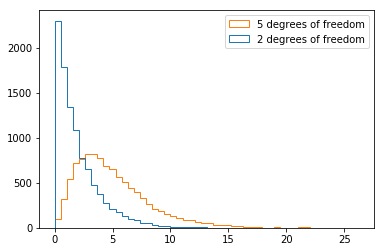

In [180]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')


# Hypothesis Testing

In [191]:
df = pd.read_csv('grades.csv')

In [192]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [38]:
len(df)

2315

In [205]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

As you've seen, the pandas data frame object has a variety of statistical functions associated with it. If we call the mean function directly on the data frame, we see that each of the means for the assignments are calculated.

Note that the date time values are ignored as panda's knows this isn't a number, but an object type. If we look at the mean values for the late data frame as well, we get surprisingly similar numbers. There are slight differences, though. It looks like the end of the six assignments, the early users are doing better by about a percentage point (at least for the first 3 assignments).

In [40]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [41]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

So, is this enough to go ahead and make some interventions to actually try and change something in the way we teach? When doing hypothesis testing, we have to choose a significance level as a threshold for how much of a chance we're willing to accept. This significance level is typically called alpha. It can vary greatly, depending on what you're going to do with the result and the amount of noise you expect in your data.

For instance, in social sciences research, a value of 0.05 or 0.01 is often used, which indicates a tolerance for a probability of between 5% and 1% of chance. In a physics experiment where the conditions are much more controlled and thus, the burden of proof is much higher, you might expect to see alpha levels of 10 to the negative 5 or 100,000th of a percentage.

In [219]:
from scipy import stats
stats.ttest_ind?

So the threshold you set for alpha depends on what you might do with the result, as well. For this example, let's use a threshold of 0.05 for our alpha or 5%. Now, how do we actually test whether these means are different in Python? The SciPy library contains a number of different statistical tests and forms a basis for hypothesis testing in Python. A T test is one way to compare the means of two different populations. In the SciPy library, the Ttest_ind function will compare two independent samples to see if they have different means.

In [210]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [211]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [212]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.08710151634155668)

In [213]:
stats.ttest_ind(early['assignment4_grade'], late['assignment4_grade'])

Ttest_indResult(statistic=0.16232182017140787, pvalue=0.8710666110447575)

In [214]:
stats.ttest_ind(early['assignment5_grade'], late['assignment5_grade'])

Ttest_indResult(statistic=0.06063973879942835, pvalue=0.9516513635792873)

In [218]:
stats.ttest_ind(early['assignment6_grade'], late['assignment6_grade'])

Ttest_indResult(statistic=-0.00976775475765312, pvalue=0.9922074255698552)